In [22]:
%run Kaggle_COVID19_Data.ipynb
%run Unemployment_Rates_MartoSep_2020.ipynb
%run Death_Counts.ipynb
%run GDP_Growth_Q2_2020.ipynb
%run Mortality_rates.ipynb

<ipython-input-22-23e1dcca6101>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[~excess_mortality_df["country"].str.contains('Netherlands')]
<ipython-input-22-23e1dcca6101>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[~excess_mortality_df["country"].str.contains('Ecuador')]
<ipython-input-22-23e1dcca6101>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[~excess_mortality_df["country"].str.contains('Spain')]
<ipython-input-22-23e1dcca6101>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[~excess_mortality_df["country"].str.contains('France')]
<ipython-input-22-23e1dcca6101>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[~excess_mortality_df["country"].str.contains('Turkey')]
<ipython-input-22-23e1dcca6101>:8: UserWarning: Bo

In [11]:
#Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

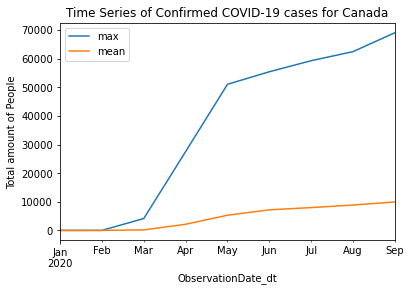

In [61]:
#Question 1 Time Series on Canada Infection waves
#Time series of Confirmed for Canada(Kaggle COVID-19 Data)
canada_covid_df.plot(kind='line',x="ObservationDate_dt", y='Confirmed')
plt.ylabel("Total amount of People")
plt.title("Time Series of Confirmed COVID-19 cases for Canada")
plt.savefig("../Pictures/Question1_timeseries", bbox_inches = "tight")
#Confirmed cases sharply rose around april which is when outbreak began
#Average cases kept steady in Canada until September

In [67]:
#Question 3 Economic Impact of COVID-19 in Canada(Kaggle COVID-19/Unemployment Rates - Mar-Sep 2020)
#regression between confrimed infected amount per month vs unemployment
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(canada_covid_df2['Confirmed']['max'], canada_merge_df['Value'])
regress_values = canada_covid_df2['Confirmed']['max'] * slope + intercept 
line_eq1 = 'y = ' + str(slope) + "x + " + str(round(intercept, 2))
corr = st.pearsonr(canada_merge_df['Value'], canada_covid_df2['Confirmed']['max'])
print(line_eq1,f'/ R = {corr[0]}')
#As seen from the very small correlation there seems to be no linear relationship between infected per month and unemployment rates per month

y = 1.9597509365426715e-05x + 10.06 / R = 0.20937114687499903


In [80]:
#plot regression graph
plt.scatter(canada_covid_df2['Confirmed']['max'], canada_merge_df['Value'])
plt.plot(canada_covid_df2['Confirmed']['max'],regress_values,"r-")
plt.annotate(line_eq1,(19,5000),fontsize=15,color="red")
plt.xlabel('Confirmed Infected')
plt.ylabel('Unemployment Rate')
plt.title("Confirmed Infected Vs. Unemployment Rate in Canada")
plt.savefig("../Pictures/Question3_reg", bbox_inches = "tight")
plt.show()
line_eq1


ValueError: Image size of 387x167325 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 387x167325 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [62]:
#Question 4 COVID-19 Impact on mortality due to lifestyle
#regression on excess mortality and Covid infected
#(slope2, intercept2, rvalue2, pvalue2, stderr2) = st.linregress(us_covid_df2['Confirmed']['max'], int(clean_US_final2_df['deaths']))
#regress_values2 = int(us_covid_df2['Confirmed']['max']) * slope2 + intercept2 
#line_eq2 = 'y = ' + str(round(slope2, 2)) + "x + " + str(round(intercept2, 2))
#corr = st.pearsonr(clean_US_final2_df['deaths'], us_covid_df2['Confirmed']['max'])
#print(line_eq2,f'/ R = {corr[0]}')
#

In [47]:
#plot regressionon excess deaths and Covid infected
plt.scatter(us_covid_df['Confirmed']['max'], clean_US_final2_df['excess_deaths_pct'])
plt.plot(us_covid_df['Confirmed']['max'],regress_values3,"r-")
plt.annotate(line_eq3,(6,10),fontsize=15,color="red")
plt.xlabel('Total US COVID-19 Infected per Month')
plt.ylabel('Excess Deaths')
plt.title("Total US COVID-19 Infected Vs. Excess Mortality Rate")
plt.savefig("../Pictures/Question4_reg", bbox_inches = "tight")
plt.show()

In [76]:
#Question 5 Differences between COVID-19 and normal flu deaths(Death Counts.ipynb)
#regression on total deaths
(slope3, intercept3, rvalue3, pvalue3, stderr3) = st.linregress(age_grp6_df['COVID-19 Deaths'], age_grp6_df['Pneumonia or Influenza'])
regress_values3 = age_grp6_df['COVID-19 Deaths'] * slope3 + intercept3 
line_eq3 = 'y = ' + str(round(slope3, 2)) + "x + " + str(round(intercept3, 2))
corr = st.pearsonr(age_grp6_df['COVID-19 Deaths'], age_grp6_df['Pneumonia or Influenza'])
print(line_eq3, f'/ R = {corr[0]}')
#strong correlation shows total COVID-19 is very similar to total normal flu deaths like Influenza and Pneumonia 

y = 0.88x + 699.3 / R = 0.9524417945662353


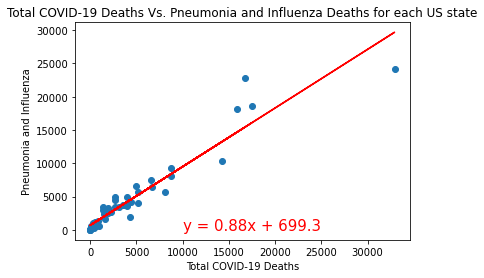

In [45]:
#plot regression on total deaths
plt.scatter(age_grp6_df['COVID-19 Deaths'], age_grp6_df['Pneumonia or Influenza'])
plt.plot(age_grp6_df['COVID-19 Deaths'],regress_values3,"r-")
plt.annotate(line_eq3,(10000,10),fontsize=15,color="red")
plt.xlabel('Total COVID-19 Deaths')
plt.ylabel('Pneumonia and Influenza')
plt.title("Total COVID-19 Deaths Vs. Pneumonia and Influenza Deaths for each US state")
plt.savefig("../Pictures/Question5_regtotal", bbox_inches = "tight")
plt.show()

In [27]:
#regression on average deaths
(slope4, intercept4, rvalue4, pvalue4, stderr4) = st.linregress(age_grp5_df['Average COVID-19 Deaths'], age_grp5_df['Average Pneumonia or Influenza'])
regress_values4 = age_grp5_df['Average COVID-19 Deaths'] * slope4 + intercept4 
line_eq4 = 'y = ' + str(round(slope4, 2)) + "x + " + str(round(intercept4, 2))
corr = st.pearsonr(age_grp5_df['Average COVID-19 Deaths'], age_grp5_df['Average Pneumonia or Influenza'])
print(line_eq4,f'/ R = {corr[0]}')
#strong correlation shows average COVID-19 is very similar to average normal flu deaths like Influenza and Pneumonia 

y = 0.89x + 7.54 {0.9307396469167233}


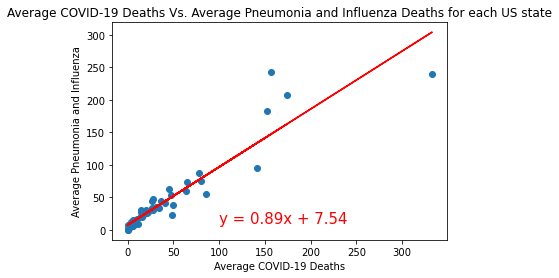

In [44]:
#plot regression on average deaths
plt.scatter(age_grp5_df['Average COVID-19 Deaths'], age_grp5_df['Average Pneumonia or Influenza'])
plt.plot(age_grp5_df['Average COVID-19 Deaths'],regress_values4,"r-")
plt.annotate(line_eq4,(100,10),fontsize=15,color="red")
plt.xlabel('Average COVID-19 Deaths')
plt.ylabel('Average Pneumonia and Influenza')
plt.title("Average COVID-19 Deaths Vs. Average Pneumonia and Influenza Deaths for each US state")
plt.savefig("../Pictures/Question5_regavg", bbox_inches = "tight")
plt.show()

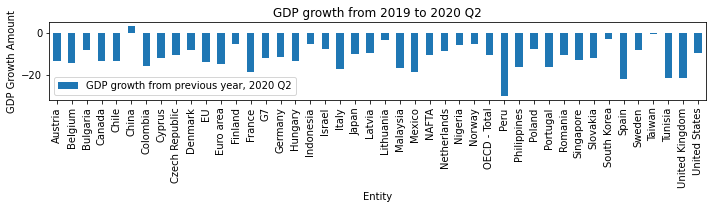

In [36]:
#Question 7 Key patterns observed between responses and long-term economic impact
#bar graph comparing GDP growth for each country(GDP Growth-Q2)
econ_df.plot.bar(x='Entity', y='GDP growth from previous year, 2020 Q2', figsize=(10,3))
plt.ylabel('GDP Growth Amount')
plt.title("GDP growth from 2019 to 2020 Q2")
plt.tight_layout()
plt.savefig("../Pictures/Question7_bar")
#Most contries are showing a large decrease in GDP which will result in a neagtive effect to long term economies around the world